In [7]:
import refinitiv.data as rd
from refinitiv.data.content import news
from IPython.display import HTML
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import time
import warnings
import re
warnings.filterwarnings("ignore")


# Imports the RD library
import refinitiv.data as rd  
from refinitiv.data.content import search

In [119]:
import refinitiv.dataplatform.eikon as ek

ek.set_app_key('282bba2a7fa04d84b672e19710e2c9c520bd95bb')

df, err = ek.get_data(
    instruments = [ '.SETI'],
    fields = [
        'TR.Priceclose',
        'TR.Priceclose.date'
    ],
     parameters={'SDate': '2000-01-01',"EDate":"1D"}
)
df.dropna(inplace= True)

In [120]:
df["Date"] = pd.to_datetime(df.Date).dt.date


# Set column 'A' as the index
df = df.set_index('Date')

df= df [["Price Close"]]

df = df.pct_change().dropna()

In [59]:
import  Backtestlib


/Users/nuthdanai/Desktop/PYTHON/Nuth all class/Investment
##########

Magicians are blowing themselves up all over the place.

##########


In [104]:
df

,Price Close
Date,
2000-01-04,0.034321
2000-01-05,-0.065421
2000-01-06,-0.048063
2000-01-07,0.022212
2000-01-10,0.013589
...,...
2024-01-12,0.003756
2024-01-15,-0.004605
2024-01-16,-0.003767


In [61]:
Backtestlib. skewness(df["Price Close"])

-0.6534289719285229

In [62]:
Backtestlib.drawdown(df["Price Close"])

,Wealth,Previous Peak,Drawdown
Date,,,
2000-01-04,1034.321049,1034.321049,0.0
2000-01-05,966.654216,1034.321049,-0.065421
2000-01-06,920.194223,1034.321049,-0.11034
2000-01-07,940.6333,1034.321049,-0.090579
2000-01-10,953.415505,1034.321049,-0.078221
...,...,...,...
2024-01-12,2933.12168,3815.903054,-0.231343
2024-01-15,2919.613214,3815.903054,-0.234883
2024-01-16,2908.615538,3815.903054,-0.237765


In [67]:
topdrowdown , df_dd = Backtestlib.group_drawdown(df["Price Close"])

In [100]:
topdrowdown

,,Previous Peak,Drawdown
Previous Peak,Date,,
1898.717629,2008-10-29,1898.717629,-0.580178
1034.321049,2000-10-11,1034.321049,-0.497252
3815.903054,2020-03-23,3815.903054,-0.442913
1647.597112,2004-05-17,1647.597112,-0.267503
3410.171813,2014-01-03,3410.171813,-0.254839
...,...,...,...
2158.968293,2010-11-05,2158.968293,0.0
2180.403386,2011-01-05,2180.403386,0.0
2208.561587,2011-04-01,2208.561587,0.0


In [103]:
df_dd.head(6)

,start_date,end_date,previous_peeks,drowdown,drowdown_date,drowdown_length,recovery_length,total_length
0,2007-10-29,2010-08-31,1898.717629,-0.580178,2008-10-29,263,479,742
1,2000-01-04,2003-07-15,1034.321049,-0.497252,2000-10-11,202,719,921
2,2018-01-24,2024-01-17,3815.903054,-0.442913,2020-03-23,564,998,1562
3,2004-01-12,2007-07-02,1647.597112,-0.267503,2004-05-17,91,815,906
4,2013-05-21,2017-09-11,3410.171813,-0.254839,2014-01-03,164,961,1125
5,2011-08-01,2012-02-23,2374.128486,-0.252321,2011-10-04,47,102,149


In [107]:
# Filter the DataFrame where column 'drowdown' is greater than 2
filtered_df = df_dd [df_dd ['drowdown'] < 0]


In [111]:
filtered_df .head(10)

,start_date,end_date,previous_peeks,drowdown,drowdown_date,drowdown_length,recovery_length,total_length
0,2007-10-29,2010-08-31,1898.717629,-0.580178,2008-10-29,263,479,742
1,2000-01-04,2003-07-15,1034.321049,-0.497252,2000-10-11,202,719,921
2,2018-01-24,2024-01-17,3815.903054,-0.442913,2020-03-23,564,998,1562
3,2004-01-12,2007-07-02,1647.597112,-0.267503,2004-05-17,91,815,906
4,2013-05-21,2017-09-11,3410.171813,-0.254839,2014-01-03,164,961,1125
5,2011-08-01,2012-02-23,2374.128486,-0.252321,2011-10-04,47,102,149
6,2007-07-26,2007-10-10,1834.661355,-0.150957,2007-08-16,16,39,55
7,2012-05-03,2012-09-05,2573.103420,-0.113610,2012-06-05,24,66,90
8,2003-11-05,2003-12-09,1397.949867,-0.101930,2003-11-25,15,11,26
9,2011-01-06,2011-03-31,2180.818393,-0.096948,2011-02-10,26,35,61


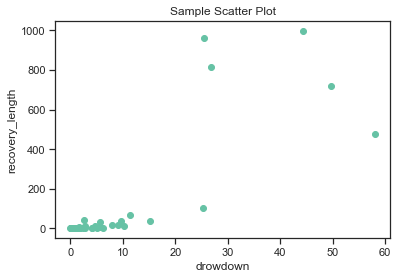

In [109]:
# Plot Data
import matplotlib.pyplot as plt

# Sample data
x = filtered_df ["drowdown"]*-1 * 100
y = filtered_df ["recovery_length"]


# Calculating the trend line
m, b = np.polyfit(x, y, 1)  # Linear fit (degree 1 polynomial)
trend_line = m * x + b


# Create a scatter plot
plt.scatter(x, y)

# Adding title and labels
plt.title('Sample Scatter Plot')
plt.xlabel('drowdown')
plt.ylabel('recovery_length')

# Show the plot
plt.show()


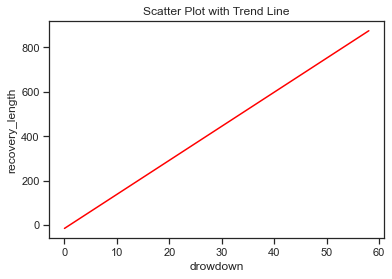

In [110]:
# Add the trend line to the scatter plot
plt.plot(x, trend_line, color='red')  # Change color as needed

# Adding title and labels
plt.title('Scatter Plot with Trend Line')
plt.xlabel('drowdown')
plt.ylabel('recovery_length')

# Show the plot
plt.show()

In [95]:
b

-53.248750791113736

In [96]:
m

16.543156756742754

In [112]:
filtered_df .head(10)

,start_date,end_date,previous_peeks,drowdown,drowdown_date,drowdown_length,recovery_length,total_length
0,2007-10-29,2010-08-31,1898.717629,-0.580178,2008-10-29,263,479,742
1,2000-01-04,2003-07-15,1034.321049,-0.497252,2000-10-11,202,719,921
2,2018-01-24,2024-01-17,3815.903054,-0.442913,2020-03-23,564,998,1562
3,2004-01-12,2007-07-02,1647.597112,-0.267503,2004-05-17,91,815,906
4,2013-05-21,2017-09-11,3410.171813,-0.254839,2014-01-03,164,961,1125
5,2011-08-01,2012-02-23,2374.128486,-0.252321,2011-10-04,47,102,149
6,2007-07-26,2007-10-10,1834.661355,-0.150957,2007-08-16,16,39,55
7,2012-05-03,2012-09-05,2573.103420,-0.113610,2012-06-05,24,66,90
8,2003-11-05,2003-12-09,1397.949867,-0.101930,2003-11-25,15,11,26
9,2011-01-06,2011-03-31,2180.818393,-0.096948,2011-02-10,26,35,61


In [121]:
df_ = Backtestlib.drawdown(df["Price Close"])
df_ 

,Wealth,Previous Peak,Drawdown
Date,,,
2000-01-04,1034.321049,1034.321049,0.0
2000-01-05,966.654216,1034.321049,-0.065421
2000-01-06,920.194223,1034.321049,-0.11034
2000-01-07,940.6333,1034.321049,-0.090579
2000-01-10,953.415505,1034.321049,-0.078221
...,...,...,...
2024-01-12,2933.12168,3815.903054,-0.231343
2024-01-15,2919.613214,3815.903054,-0.234883
2024-01-16,2908.615538,3815.903054,-0.237765


<AxesSubplot:xlabel='Date'>

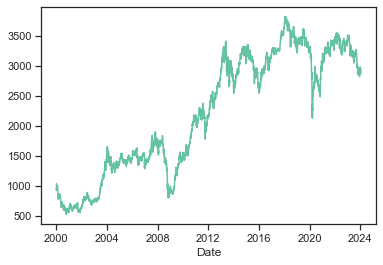

In [123]:
df_.Wealth.plot()

<AxesSubplot:xlabel='Date'>

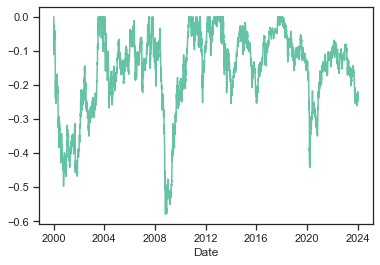

In [122]:
df_ .Drawdown.plot()

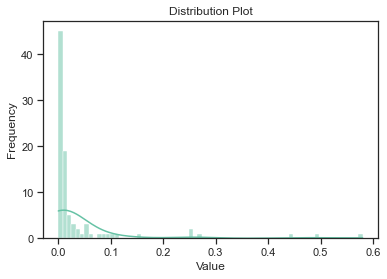

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = filtered_df.drowdown *-1

# Create a distribution plot
sns.histplot(data, kde=True)

# Adding title and labels
plt.title('Distribution Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [132]:
filtered_df.head(9)

,start_date,end_date,previous_peeks,drowdown,drowdown_date,drowdown_length,recovery_length,total_length
0,2007-10-29,2010-08-31,1898.717629,-0.580178,2008-10-29,263,479,742
1,2000-01-04,2003-07-15,1034.321049,-0.497252,2000-10-11,202,719,921
2,2018-01-24,2024-01-17,3815.903054,-0.442913,2020-03-23,564,998,1562
3,2004-01-12,2007-07-02,1647.597112,-0.267503,2004-05-17,91,815,906
4,2013-05-21,2017-09-11,3410.171813,-0.254839,2014-01-03,164,961,1125
5,2011-08-01,2012-02-23,2374.128486,-0.252321,2011-10-04,47,102,149
6,2007-07-26,2007-10-10,1834.661355,-0.150957,2007-08-16,16,39,55
7,2012-05-03,2012-09-05,2573.103420,-0.113610,2012-06-05,24,66,90
8,2003-11-05,2003-12-09,1397.949867,-0.101930,2003-11-25,15,11,26
